In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/colab/model_testing/pricerunner_aggregate.csv")
print(dataset.head())

   product_id                                      product_title  vendor_id  \
0           1                    apple iphone 8 plus 64gb silver          1   
1           2                apple iphone 8 plus 64 gb spacegrau          2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...          3   
3           4                apple iphone 8 plus 64gb space grey          4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...          5   

   cluster_id             cluster_label  category_id category_label  
0           1  Apple iPhone 8 Plus 64GB            0  Mobile Phones  
1           1  Apple iPhone 8 Plus 64GB            0  Mobile Phones  
2           1  Apple iPhone 8 Plus 64GB            0  Mobile Phones  
3           1  Apple iPhone 8 Plus 64GB            0  Mobile Phones  
4           1  Apple iPhone 8 Plus 64GB            0  Mobile Phones  


In [5]:
dataset.shape

(35311, 7)

In [8]:
dataset['category_label'].value_counts()

Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: category_label, dtype: int64

In [10]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['category_label'].unique()
print(target_category)

['Mobile Phones' 'TVs' 'CPUs' 'Digital Cameras' 'Microwaves' 'Dishwashers'
 'Washing Machines' 'Freezers' 'Fridge Freezers' 'Fridges']


In [12]:
dataset['categoryid'] = dataset['category_id'].factorize()[0]
dataset.head()

,product_id,product_title,vendor_id,cluster_id,cluster_label,category_id,category_label,categoryid
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,0,Mobile Phones,0
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,0,Mobile Phones,0
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,0,Mobile Phones,0
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,0,Mobile Phones,0
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,0,Mobile Phones,0


In [14]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['category_label', 'category_id']].drop_duplicates().sort_values('category_id')
category

,category_label,category_id
0,Mobile Phones,0
11507,Digital Cameras,0
4081,TVs,1
14204,Microwaves,1
16546,Dishwashers,1
19970,Washing Machines,1
24014,Freezers,1
26226,Fridge Freezers,1
31727,Fridges,1
7645,CPUs,3


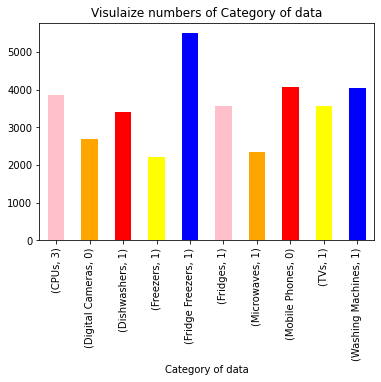

In [16]:
dataset.groupby('category_label').category_id.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

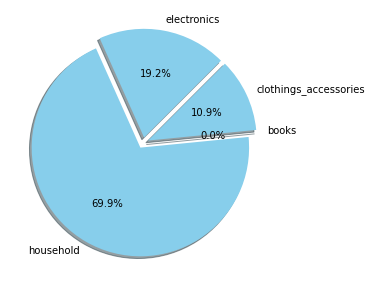

In [25]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
electronics = dataset[dataset['category_id'] == 0 ]
household = dataset[dataset['category_id'] == 1]
books = dataset[dataset['category_id'] == 2]
clothings_accessoseries= dataset[dataset['category_id'] == 3]

count = [electronics['category_id'].count(), household['category_id'].count(), books['category_id'].count(), clothings_accessoseries['category_id'].count()]
pie = plt.pie(count, labels = ['electronics', 'household', 'books', 'clothings_accessories'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05)
              
              
              )
              

Here we use the word cloud module to show the category-related words.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

electronics related words:


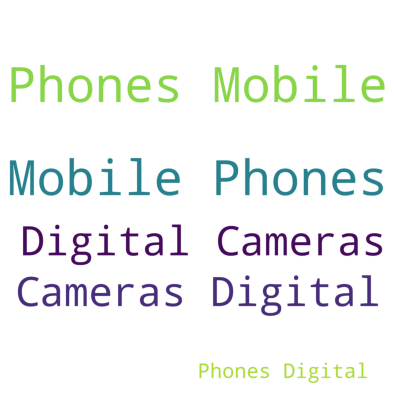

household related words:


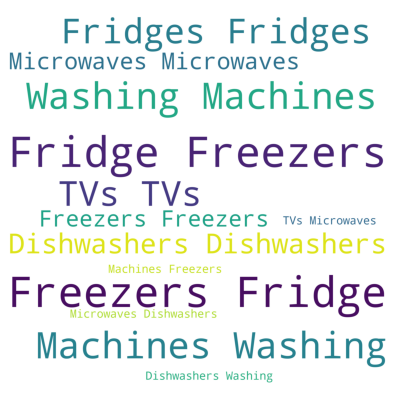

clothings and accessoriess related words:


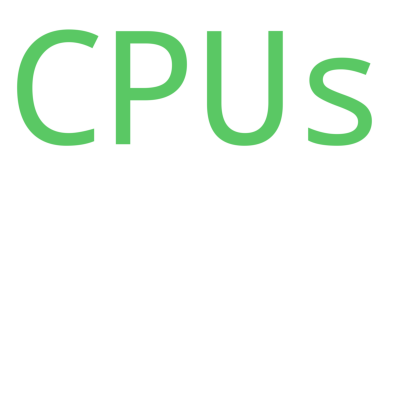

In [31]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

electronics = dataset[dataset['category_id'] == 0]

electronics = electronics['category_label']

household = dataset[dataset['category_id'] == 1]
household = household['category_label']

#books = dataset[dataset['category_id'] == 2]

#books = books['category_label']

clothings_accessoseries = dataset[dataset['category_id'] == 3]

clothings_accessoseries = clothings_accessoseries['category_label']


def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_word = ' '.join([word for word in words.split()
  
  if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
  background_color = color,
  width = 2500, height = 2500).generate(cleaned_word)
  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("electronics related words:")
wordcloud_draw(electronics, 'white')

print("household related words:")
wordcloud_draw(household, 'white')

#print("books related words:")
#wordcloud_draw(books, 'white')

print("clothings and accessoriess related words:")

wordcloud_draw(clothings_accessoseries, 'white')



Show category label Column of Dataset

In [33]:
category_label = dataset["category_label"]
category_label.head(10)

0    Mobile Phones
1    Mobile Phones
2    Mobile Phones
3    Mobile Phones
4    Mobile Phones
5    Mobile Phones
6    Mobile Phones
7    Mobile Phones
8    Mobile Phones
9    Mobile Phones
Name: category_label, dtype: object

In [34]:
category_id = dataset['category_id']
category_id.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: category_id, dtype: int64

Declared Dependent and Independent Value

In [35]:

x = dataset['category_label']
y = dataset['category_id']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.category_id.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.category_label).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (35311, 13)
y.shape =  (35311,)


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))


24717
10594


In [38]:
#create list of model and accuracy dicts
perform_list = [ ]

In [45]:
def run_model(model_name, est_c, est_pnlty):
  mdl=''
  
  if model_name == 'Logistic Regression':
    mdl = LogisticRegression()
    
  elif model_name == 'Random Forest':
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
      
  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  elif model_name == 'Support Vector Classifer':
    mdl = SVC()
  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()
  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
      # Add performance parameters to list
    perform_list.append(dict([ ('Model', model_name), 
                                ('Test Accuracy', round(accuracy, 2)), 
                                ('Precision', round(precision, 2)),
                                ('Recall', round(recall, 2)),
                                ('F1', round(f1score, 2))]))

In [52]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

In [53]:
run_model('Random Forest', est_c=None, est_pnlty=None)

In [54]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

In [55]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

In [56]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

In [57]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

In [58]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 100.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0


In [51]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Gaussian Naive Bayes,100.0,1.0,1.0,1.0
